# Steps of the Notebook
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Visualize the data](#2)
- [3. Before Data Augmantation](#3)
    - [3.1. Data Preprocessing](#3.1)
    - [3.2. Splitting the data into Training and Testing datasets](#3.2)
    - [3.3. Normalization](#3.3)
    - [3.4 CNN](#3.4)
- [4. After Data Augmantation](#4)

<a id='1'></a>
# Import Libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import seaborn as sns
import cv2
import random
from os import listdir
import pathlib

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import  LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True) # Save the data in the current directory

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

<a id='2'></a>
# Visualize the data

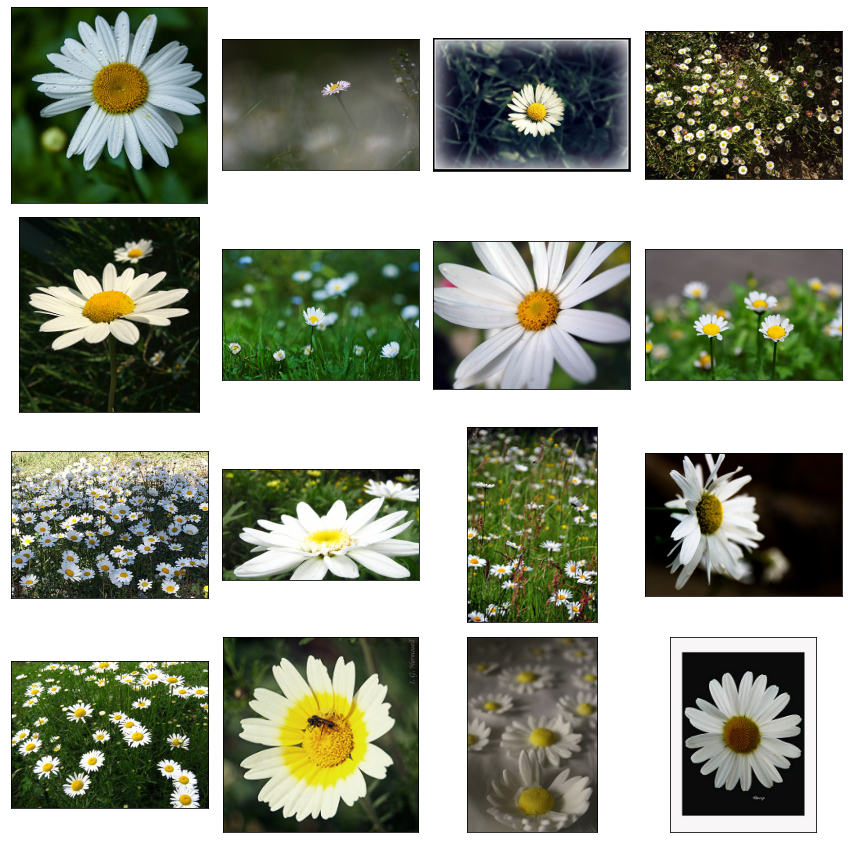

In [6]:
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "datasets/flower_photos/daisy"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

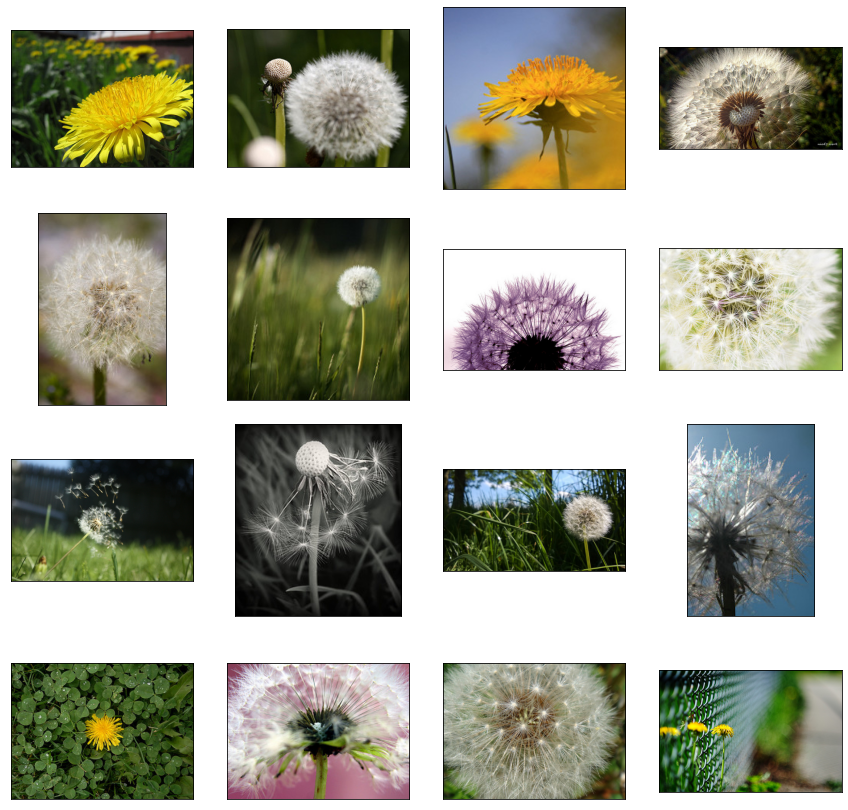

In [7]:
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "datasets/flower_photos/dandelion"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

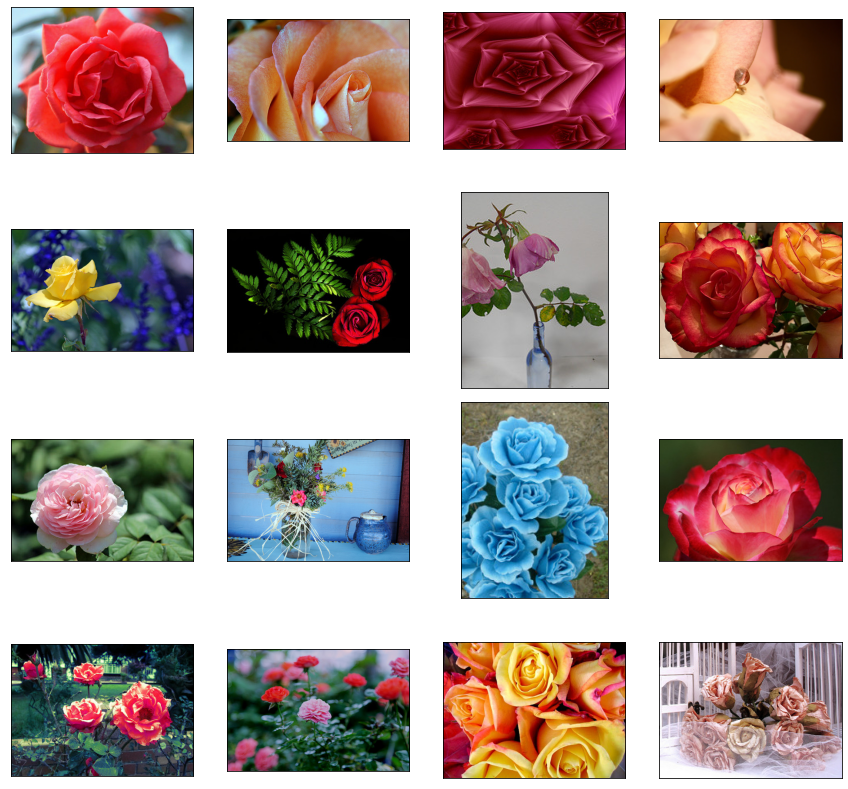

In [8]:
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "datasets/flower_photos/roses/"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

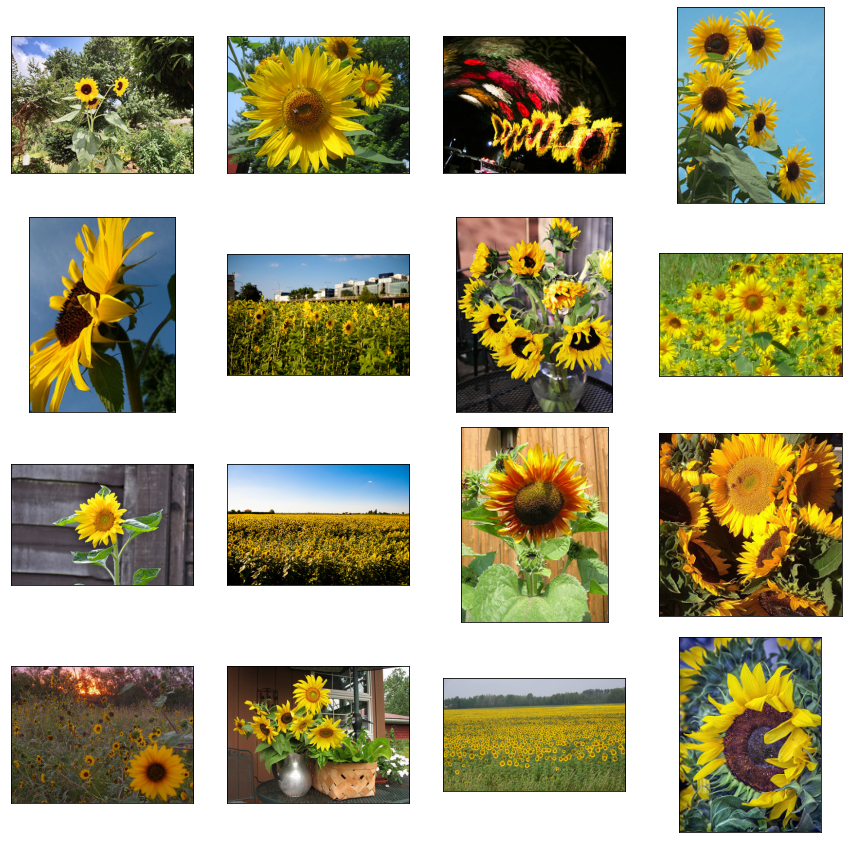

In [9]:
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "datasets/flower_photos/sunflowers"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

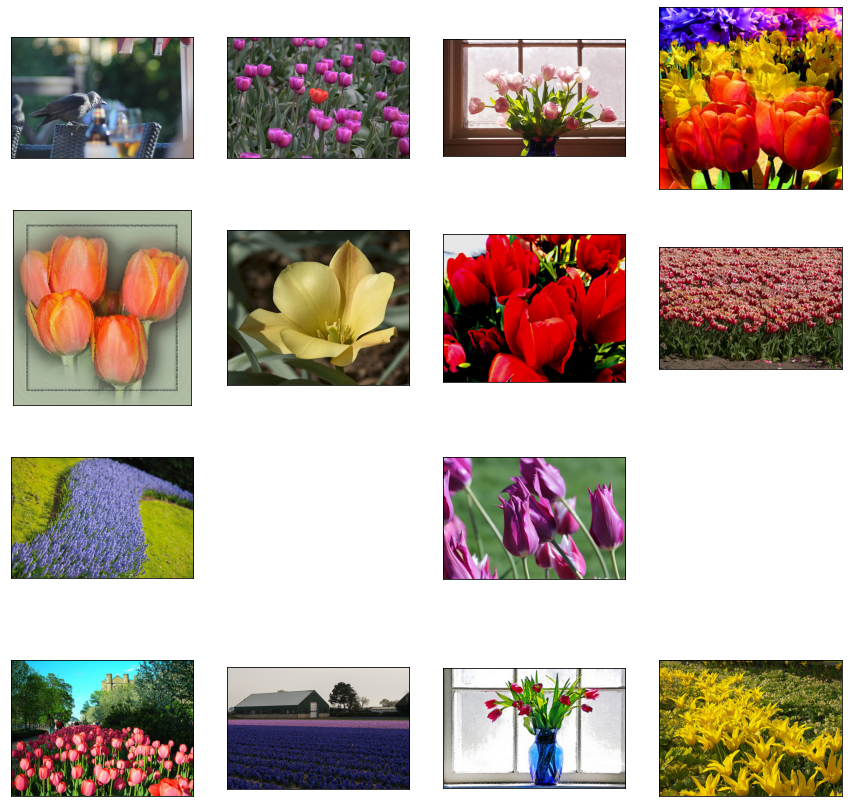

In [10]:
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "datasets/flower_photos/tulips/"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

<a id='3'></a>
# Before Data Augmantation

<a id='3.1'></a>
**Data Preprocessing**

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [13]:
X = np.array(X)
y = np.array(y)

<a id='3.2'></a>
**Spliting Data into Training and Testing datasets**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<a id='3.3'></a>
**Normalization**

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [16]:
X.shape

(3670, 180, 180, 3)

In [17]:
early_stopping = callbacks.EarlyStopping(
        patience=10,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

<a id='3.4'></a>
**CNN**

In [19]:
num_classes = 5

model = Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape = (X.shape[1], X.shape[2], X.shape[3])),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(256, activation='relu'),
  Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])
              
model.fit(X_train_scaled, y_train,
          validation_data = (X_test_scaled, y_test),
          callbacks=[early_stopping, plateau],
          epochs=1000)     

Epoch 1/1000
86/86 [==============================] - 28s 316ms/step - loss: 1.4426 - acc: 0.4081 - val_loss: 1.0743 - val_acc: 0.5523 - lr: 0.0010
Epoch 2/1000
86/86 [==============================] - 31s 359ms/step - loss: 0.9864 - acc: 0.6148 - val_loss: 0.9535 - val_acc: 0.6285 - lr: 0.0010
Epoch 3/1000
86/86 [==============================] - 30s 351ms/step - loss: 0.7851 - acc: 0.7100 - val_loss: 0.9844 - val_acc: 0.6166 - lr: 0.0010
Epoch 4/1000
86/86 [==============================] - 29s 333ms/step - loss: 0.5848 - acc: 0.7863 - val_loss: 0.9715 - val_acc: 0.6329 - lr: 0.0010
Epoch 5/1000
86/86 [==============================] - 28s 320ms/step - loss: 0.3650 - acc: 0.8714 - val_loss: 1.2208 - val_acc: 0.6275 - lr: 0.0010
Epoch 6/1000
86/86 [==============================] - 28s 324ms/step - loss: 0.2003 - acc: 0.9375 - val_loss: 1.4402 - val_acc: 0.6405 - lr: 0.0010
Epoch 7/1000
86/86 [==============================] - 28s 325ms/step - loss: 0.0784 - acc: 0.9833 - val_loss: 1.

In [21]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 2s 68ms/step - loss: 0.9535 - acc: 0.6285


[0.9534605741500854, 0.6285402774810791]

**OverFitting, data augmantation is a good technique to handle Overfitting problem**

<a id='4'></a>
# After Data Augmantation

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),
  ]
)

**Image before and after augmantation**

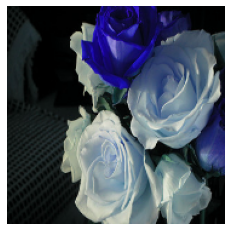

In [23]:
# original Image
plt.axis('off')
plt.imshow(X[1]);

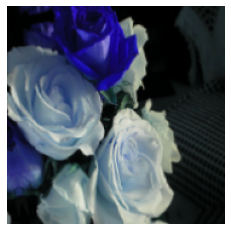

In [24]:
# New Generated image using data augmantation
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype("uint8"));

In [25]:
num_classes = 5

model = Sequential([
  data_augmentation,
  Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])
              
model.fit(X_train_scaled, y_train, 
          validation_data= (X_test_scaled, y_test),
          callbacks=[early_stopping, plateau],
          epochs=1000)

Epoch 1/1000
86/86 [==============================] - 31s 354ms/step - loss: 1.4731 - acc: 0.3674 - val_loss: 1.1605 - val_acc: 0.5163 - lr: 0.0010
Epoch 2/1000
86/86 [==============================] - 32s 367ms/step - loss: 1.0638 - acc: 0.5690 - val_loss: 1.0281 - val_acc: 0.5991 - lr: 0.0010
Epoch 3/1000
86/86 [==============================] - 32s 367ms/step - loss: 0.9450 - acc: 0.6355 - val_loss: 1.0823 - val_acc: 0.6035 - lr: 0.0010
Epoch 4/1000
86/86 [==============================] - 34s 397ms/step - loss: 0.9005 - acc: 0.6490 - val_loss: 1.1323 - val_acc: 0.5882 - lr: 0.0010
Epoch 5/1000
86/86 [==============================] - 37s 428ms/step - loss: 0.8394 - acc: 0.6777 - val_loss: 0.8672 - val_acc: 0.6754 - lr: 0.0010
Epoch 6/1000
86/86 [==============================] - 33s 381ms/step - loss: 0.7767 - acc: 0.7009 - val_loss: 0.8348 - val_acc: 0.6863 - lr: 0.0010
Epoch 7/1000
86/86 [==============================] - 34s 399ms/step - loss: 0.7569 - acc: 0.7155 - val_loss: 0.

In [26]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 5s 184ms/step - loss: 0.7123 - acc: 0.7495


[0.7122578620910645, 0.7494553327560425]

**After Data Augmantation Accuarcy goes from 66% on testing dataset to 75%**